***SCORING***

<a id="sec1"></a>
# [Description](#sec1)

Enter text here

<a id="sec1.1"></a>
## [Features Defination](sec1.1)

client_id -  client ID

education - the level of education

sex - borrowe's gender

age - borrowers age

car - has(has no) car

car_type - flag of car type

decline_app_cnt - number of rejected past applications

good_work - good job flag

bki_request_cnt - number of requests to Credit bureau

home_address - home address categorizer 

work_address - work address categorizer 

income - borrower's income

foreign_passport - has (has no) traveling passport

default - has (has no) default

<a id="sec2"></a>
# [INDEX](#sec2)
1. [Description](#sec1)
    * [1.1 Features Defination](#sec1.1)
2. [INDEX](#sec2)
3. [IMPORT LIBRARRIES](#sec3)
4. [Load and Chek the Dataset](#sec4)
5. [Visualization](#sec5)
    * [5.1 Correclation](#sec5.1)
    * [Significance of continuous variables ](#sec5.2)
6. [Categorical Vars](#sec6)

<a id="sec3"></a>
# [IMPORT LIBRARRIES](sec3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

<a id="sec4"></a>
# [Load and Chek the Dataset](#sec4)

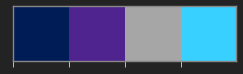

In [2]:
colors = ['#001c57', '#50248f', '#a6a6a6', '#38d1ff']
sns.palplot(sns.color_palette(colors))

In [3]:
df = pd.read_csv('train.csv')
df.sample(3)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
2399,70612,SCH,F,31,N,N,3,1,3,1,2,20000,N,1
29133,61217,SCH,M,25,Y,N,0,0,1,1,2,45000,N,0
57606,77811,SCH,F,67,N,N,0,0,5,2,3,14300,N,0


In [ ]:
df.info()

<a id="sec5"></a>
# [Visualization](#sec5)

Ler's check how our target variable distributed

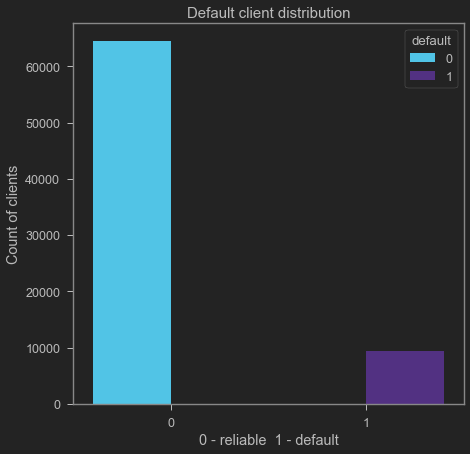

In [4]:
plt.figure(figsize=(7, 7))
sns.countplot(x='default',
              hue='default',
              data=df,
              color=colors[1],
              palette=[colors[3], colors[1]])
plt.title('Default client distribution', fontsize=15)
plt.xlabel('0 - reliable  1 - default')
plt.ylabel('Count of clients')
plt.show()

We may see that our data is not balanced. We have more clients who pay back their loan, which is logically correct. 

However, we need to take care about it in the future model evaluation.

Chek missing data

In [5]:
df.isnull().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

Let's fix missing data

In [6]:
df['education'] = df['education'].fillna(
    df['education'].value_counts().index[0])

Create lists with depicted types of data

In [7]:
bin_cols = ['sex','car','car_type','good_work','foreign_passport']
cat_cols = ['education','home_address','work_address']
num_cols = ['age','decline_app_cnt','income','bki_request_cnt']

Check the distrinution of numeric columns

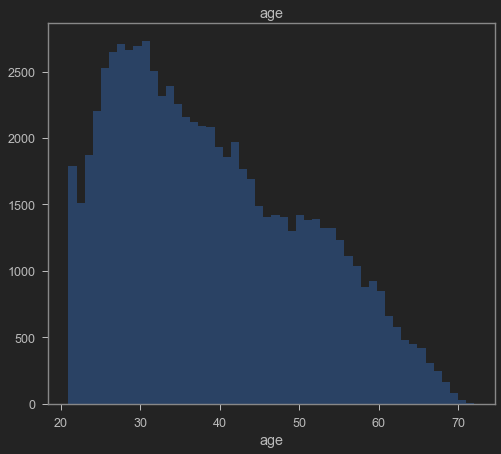

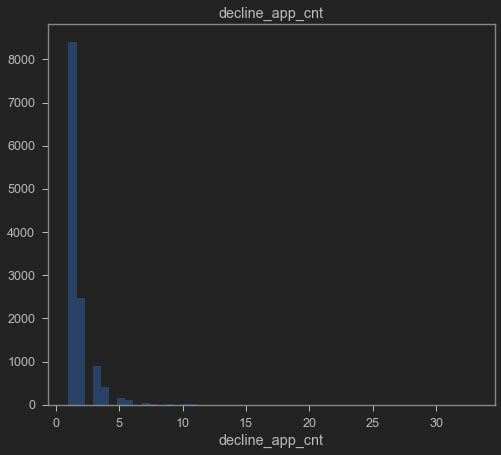

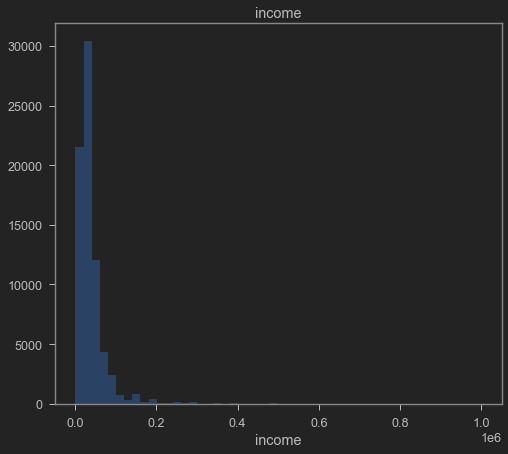

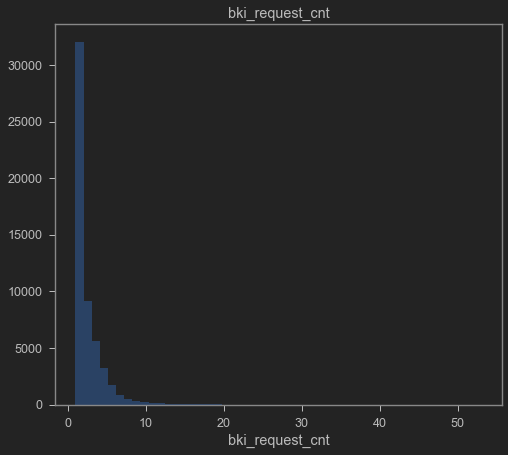

In [8]:
for i in num_cols:
    plt.figure()
    sns.distplot(df[i][df[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

BLA BLA

In [9]:
df1 = df.copy()
for col in num_cols:
    df1[col] = df[col].apply(lambda x: np.log(x+1))

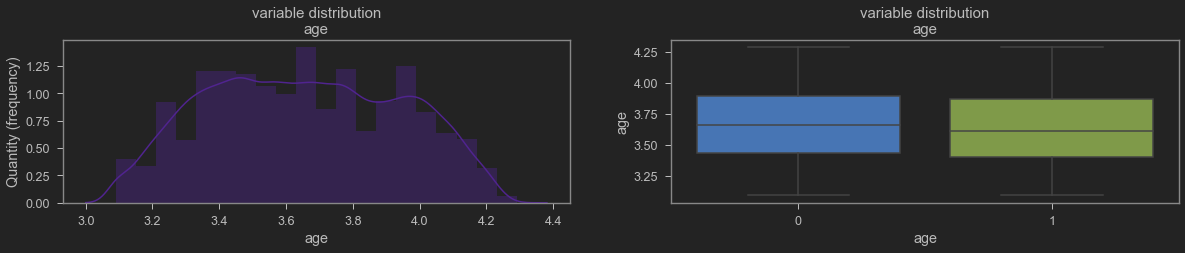

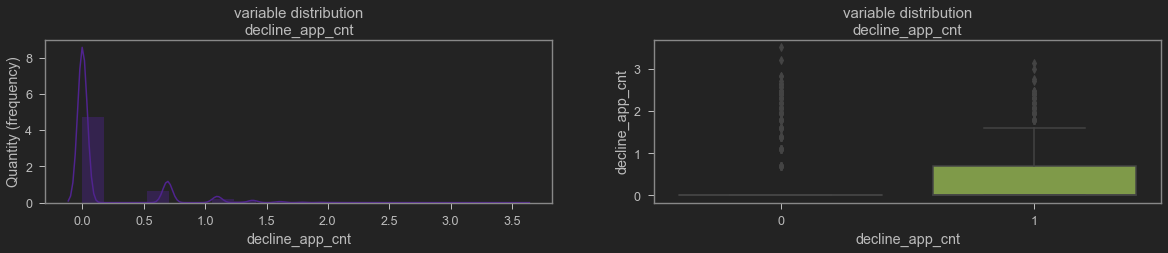

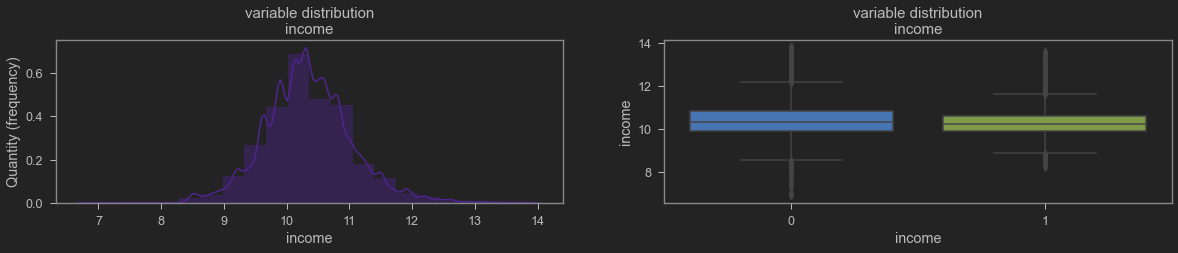

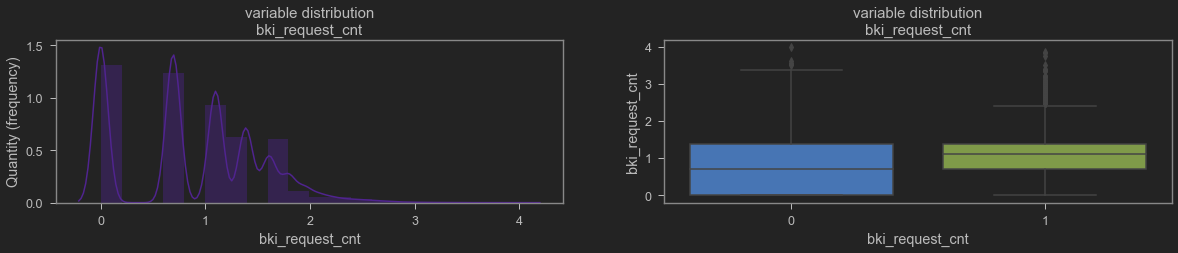

In [10]:
for i in num_cols:
    plt.figure(figsize=(20, 3))
    plt.subplot(121)
    sns.distplot(df1[i].values, bins=20, color=colors[1])
    plt.title('variable distribution\n' + i, fontsize=15)
    plt.xlabel(i)
    plt.ylabel('Quantity (frequency)')

    plt.subplot(122)
    sns.boxplot(x = 'default',y = i,data=df1)
    plt.title('variable distribution\n' + i, fontsize=15)
    plt.xlabel(i)

<a id="sec5.1"></a>
## [Correclation](#sec5.1)

<AxesSubplot:>

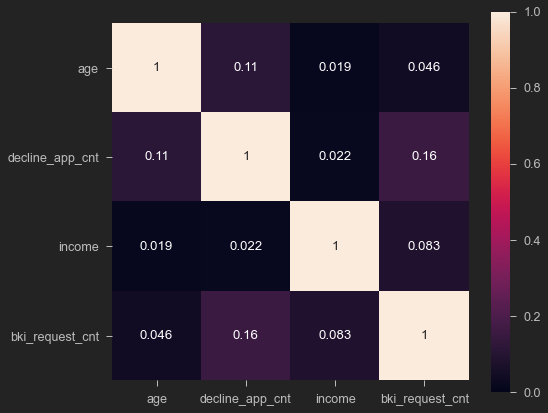

In [12]:
sns.heatmap(df[num_cols].corr().abs(),vmin=0,vmax=1,annot=True,square=True)

<a id="sec5.2"></a>
## [Significance of continuous variables ](#sec5.2)

В основе метода оценки значимости переменных лежит однофакторный дисперсионный анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t). 

В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей линейной модели

In [13]:
from sklearn.feature_selection import f_classif

<AxesSubplot:>

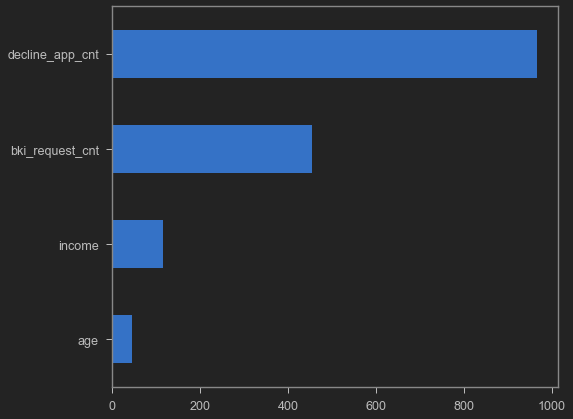

In [14]:
imp_num = pd.Series(f_classif(df[num_cols], df['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

<a id="sec6"></a>
# [Categorical Vars](#sec6)

Самый простой способ — отобразить каждое значение категории в уникальное число. Например, в поле sex значение sex = female преобразовать в , а sex = male — в . Эту простую операцию приходится делать достаточно часто, поэтому в модуле sklearn.preprocessing именно для этой задачи реализован класс LabelEncoder.

Метод fit этого класса находит все уникальные значения и строит таблицу для соответствия каждой категории некоторому числу, а метод transform непосредственно преобразует значения в числа. После fit у label_encoder будет доступно поле classes_, содержащее все уникальные значения. Можно их пронумеровать и убедиться, что преобразование выполнено верно.

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()
mapped_education = pd.Series(label_encoder.fit_transform(df['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


Сработало! Теперь всегда можно обратиться к classes_ , если забыли, что закодировали. Применим LabelEncoder ко всему набору бинарных переменных.

In [17]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])
    
# убедимся в преобразовании    
df.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,1,62,1,1,0,0,1,1,2,18000,0,0
1,63161,SCH,0,59,0,0,0,0,3,2,3,19000,0,0
2,25887,SCH,1,25,1,0,2,0,1,1,2,30000,1,0
3,16222,SCH,0,53,0,0,0,0,2,2,3,10000,0,0
4,101655,GRD,1,48,0,0,0,1,1,2,3,30000,1,0


In [18]:
from sklearn.feature_selection import mutual_info_classif

In [20]:
df2 = df.copy()

In [21]:
for column in cat_cols:
    df2[column] = label_encoder.fit_transform(df[column])
    
# убедимся в преобразовании    
df2.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,3,1,62,1,1,0,0,1,0,1,18000,0,0
1,63161,3,0,59,0,0,0,0,3,1,2,19000,0,0
2,25887,3,1,25,1,0,2,0,1,0,1,30000,1,0
3,16222,3,0,53,0,0,0,0,2,1,2,10000,0,0
4,101655,1,1,48,0,0,0,1,1,1,2,30000,1,0


<AxesSubplot:>

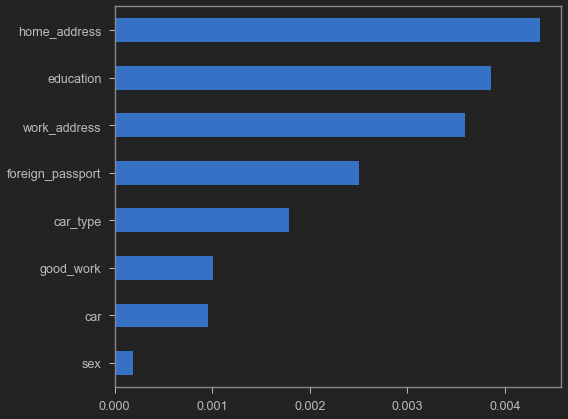

In [22]:
imp_cat = pd.Series(mutual_info_classif(df2[bin_cols + cat_cols], df2['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

# Подготовка данных к машинному обучению

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df[cat_cols].values)

In [25]:
X_cat.shape

(73799, 11)

In [26]:
from sklearn.preprocessing import StandardScaler
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(df[num_cols].values)

In [27]:
# Объединяем

X = np.hstack([X_num, df[bin_cols].values, X_cat])
Y = df['default'].values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score

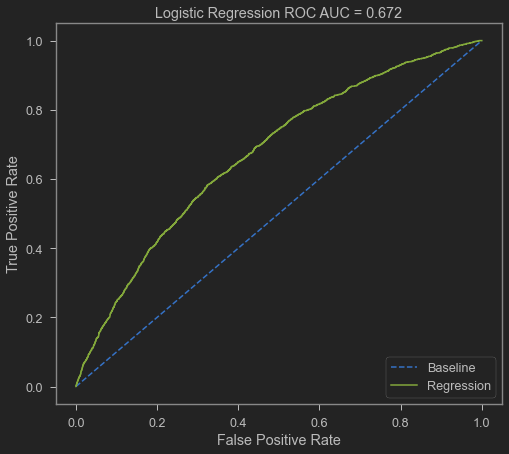

In [35]:
probs = classifier.predict_proba(X_test)
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
f1 = f1_score(y_test,y_pred)
print(f1)

0.01818181818181818


In [38]:
y_pred.sum()

43

In [39]:
y_test.sum()

1827

In [40]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучшее Penalty: l2
Лучшее C: 1.0


In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100000)
model.fit(X_train,y_train)

LogisticRegression(C=100000)

In [50]:
y_pred = model.predict(X_test)

In [51]:
f1 = f1_score(y_test,y_pred)
print(f1)

0.01818181818181818


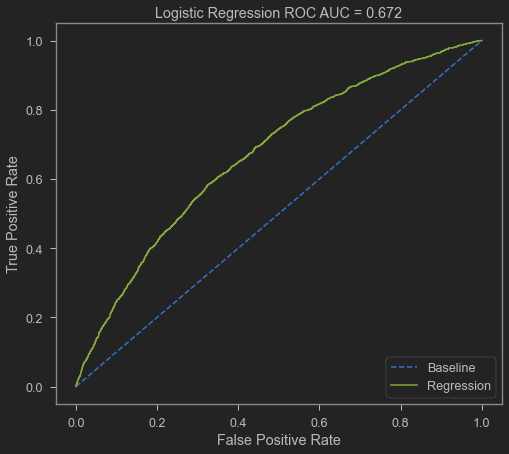

In [48]:
probs = classifier.predict_proba(X_test)
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()